## OPENTURNS Examples

### Example 1
* Normal random number generation <br>
* Showing histogram and empyrical CDF <br>
* Kernel smoothing <br>

In [104]:
>>> import openturns as ot
>>> ot.RandomGenerator.SetSeed(0)
>>> sample = ot.Normal(1).getSample(300)
>>> print(sample.computeEmpiricalCDF(sample[29]))


0.21333333333333335


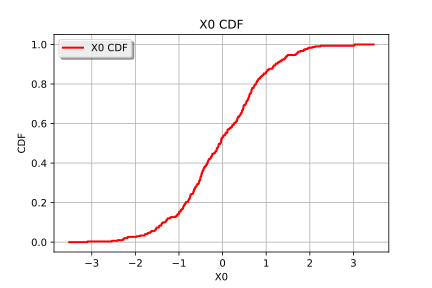

In [110]:
ot.VisualTest.DrawEmpiricalCDF(sample)


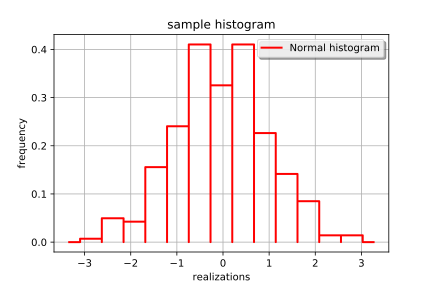

In [116]:
ot.VisualTest_DrawHistogram(sample)


C:\Users\Miodrag Bolic\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


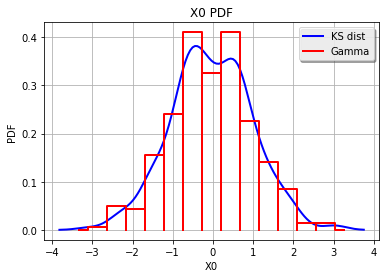

In [125]:
from openturns.viewer import View
kernel = ot.KernelSmoothing()
fittedDist = kernel.build(sample)
graph = fittedDist.drawPDF()
graph.add( ot.VisualTest.DrawHistogram(sample))
graph.setColors(['blue', 'red'])
graph.setLegends(['KS dist', 'Gamma'])
View(graph).show()

In [119]:
fittedDist.computeBilateralConfidenceInterval(0.95)

class=Interval name=Unnamed dimension=1 lower bound=class=Point name=Unnamed dimension=1 values=[-2.10782] upper bound=class=Point name=Unnamed dimension=1 values=[1.98557] finite lower bound=[1] finite upper bound=[1]

### Example 2 Create univariate distribution as a linear combination of several distributions

The example is from

$$ Y = 2 + 5X_1 + X_2 $$

where

* X1 follows a $E(λ = 1.5)$ <br>
* X2 follows a $N(µ = 4, Variance = 1) $ <br>

The example is from [OpenTurns Use Cases Guide] [guide]

[guide]: http://doc.openturns.org/openturns-latest/pdf/OpenTURNS_UseCasesGuide.pdf


C:\Users\Miodrag Bolic\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


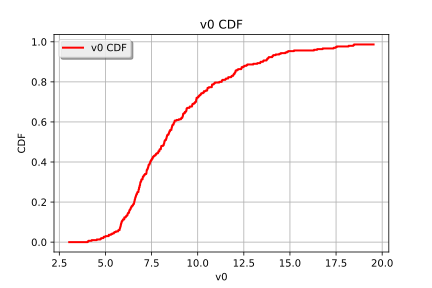

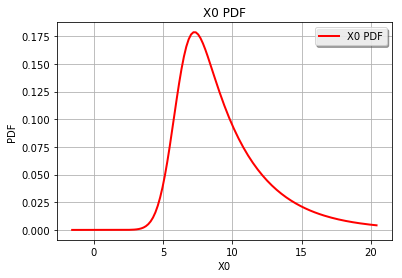

In [160]:
# C re a te the u n i v a r i a t e d i s t r i b u t i o n s
# X1 : E x p o n e n ti al ( 1 . 5 )
X1 = ot.Exponential (1.5)
# X2 : Normal(4 , 1)
X2 = ot.Normal( 4 , 1 )
# Put them i n a D i s t r i b u t i o n C o l l e c t i o n
distribList = [ X1, X2 ]
# C re a te the n um e ri c al o f the d i s t r i b u t i o n w ei g h t s
# c o e f f i c i e n t s a1 , a2
weight = ot.NumericalPoint ( [ 5. , 1. ] )
# C re a te the c o n s t a n t c o e f f i c i e n t a0
a0 = 2.0
# C re a te the Random Mixture Y = a0 + Sum( a i Xi)
myRandomMixtureY = ot.RandomMixture(distribList, weight , a0 )
# Or c r e a t e the Random Mixture where a0 = 0 : Y = Sum( ai Xi)
#myRandomMixtureY = ot.RandomMixture(distribList, weight , 0 )
# Or c r e a t e the Random Mixture where a l l the w ei g h t s ( a1 , a2 ) a r e e q u al t o 1
#myRandomMixtureY = ot.RandomMixture(distribList, a0 )
# Ask myRandomMixtureY i t s mean , v a ri a n c e , q u a n t i l e o f o r d e r 0 . 9 , i t s
# p r o b a b i l i t y t o e x c e e d s 3
mean = myRandomMixtureY.getMean( ) [ 0 ]
variance = myRandomMixtureY.getCovariance( ) [ 0 , 0 ]
quantile90 = myRandomMixtureY.computeQuantile( 0.90 ) [ 0 ]
proba = myRandomMixtureY.computeComplementaryCDF( 3.0 )
# Ask myRandomMixtureY t o draw i t s pd f
pdfY = myRandomMixtureY.drawPDF( )
# V i s u a l i z e the graph wi th ou t s a vi n g i t
View(pdfY).show( )
# Trans form the RandomMixture i n t o a RandomVector
myRandomVectorY = ot.RandomVector(myRandomMixtureY )

sample = myRandomMixtureY.getSample(300)
ot.VisualTest.DrawEmpiricalCDF(sample)

### Example 3 Taylor expansion of an arbitrary function

* Define a function of multiple variables <br>
* Generate distribution using copulas <br>
* Connect random variables and the function <br>
* Perform Taylor Expansion <br>
* Show moments and importance factors <br>

In [138]:

# Create a composite random vector
ot.RandomGenerator.SetSeed(0)
input_names = ['x1', 'x2', 'x3', 'x4']
myFunc = ot.SymbolicFunction(input_names,
     ['cos(x2*x2+x4)/(x1*x1+1+x3^4)']) #['x1+x2+x3+x4'])
R = ot.CorrelationMatrix(4)
for i in range(4):
    R[i, i - 1] = 0.25
    
# Evaluate the correlation matrix of the Normal copula from RS
R = ot.NormalCopula.GetCorrelationFromSpearmanCorrelation(RS)
# Create the Normal copula parametrized by R
copula = ot.NormalCopula(R)
distribution = ot.Normal([0.2]*4, [0.1, 0.2, 0.4, 0.8], R)
distribution.setDescription(input_names)
# We create a distribution-based RandomVector
X = ot.RandomVector(distribution)
# We create a composite RandomVector Y from X and myFunc
Y = ot.RandomVector(myFunc, X)

In [139]:
# We create a Taylor expansion method to approximate moments
myTaylorExpansionMoments = ot.TaylorExpansionMoments(Y)

In [140]:
# get mean
print(myTaylorExpansionMoments.getMeanFirstOrder())

[0.932544]


In [141]:
# get covariance
print(myTaylorExpansionMoments.getCovariance())

[[ 0.035078 ]]


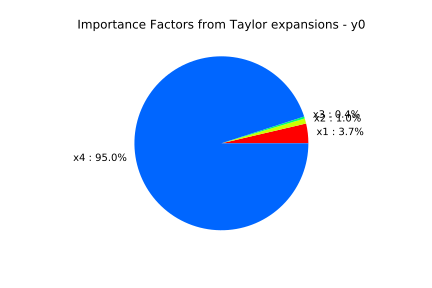

In [142]:
myTaylorExpansionMoments.drawImportanceFactors()

### Example 4 Monte Carlo Propagation and reliability analysis

* Form a model - symbolic function  <br>
* Generate distribution using copulas <br>
* Define probabilistic event of interest event <br>
* Propagate random variables through the function <br>
* Show the failure probability <br>

Example is based on [Estimate a probability using randomized quasi Monte Carlo] [link_OT]

[link_OT]: http://openturns.github.io/openturns/master/examples/reliability_sensitivity/estimate_probability_randomized_qmc.html

In [44]:
RS = ot.CorrelationMatrix(4)
# Evaluate the correlation matrix of the Normal copula from RS
R = ot.NormalCopula.GetCorrelationFromSpearmanCorrelation(RS)
# Create the Normal copula parametrized by R
copula = ot.NormalCopula(R)

In [45]:
R

class=CorrelationMatrix dimension=4 implementation=class=MatrixImplementation name=Unnamed rows=4 columns=4 values=[1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1]

In [46]:
copula

class=NormalCopula name=NormalCopula dimension=4 correlation=class=CorrelationMatrix dimension=4 implementation=class=MatrixImplementation name=Unnamed rows=4 columns=4 values=[1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1]

In [47]:

# Create the marginal distributions of the parameters
dist_E = ot.Beta(0.93, 3.2, 2.8e7, 4.8e7)
dist_F = ot.LogNormalMuSigma(30000, 9000, 15000).getDistribution()
dist_L = ot.Uniform(250, 260)
dist_I = ot.Beta(2.5, 4.0, 3.1e2, 4.5e2)
marginals = [dist_E, dist_F, dist_L, dist_I]

In [48]:
# Create the joint probability distribution
distribution = ot.ComposedDistribution(marginals, copula)

In [49]:
# create the model
model = ot.SymbolicFunction(['E', 'F', 'L', 'I'], ['F*L^3/(3*E*I)'])

In [75]:
# create the event we want to estimate the probability
vect = ot.RandomVector(distribution)
G = ot.CompositeRandomVector(model, vect)
event = ot.Event(G, ot.Greater(), 30.0)

In [76]:

# create a Monte Carlo algorithm
experiment = ot.MonteCarloExperiment()
algo = ot.ProbabilitySimulationAlgorithm(event, experiment)
algo.setMaximumCoefficientOfVariation(0.05)
algo.setMaximumOuterSampling(int(1e5))
algo.run()

In [77]:

# retrieve results
result = algo.getResult()
probability = result.getProbabilityEstimate()
print('Pf=', probability)

Pf= 0.0019


### Example 5 Monte Carlo Propagation and reliability analysis

* Form a model - symbolic function  <br>


Example is based on Uncertainty quantification and sensitivity analysis for arterial wall models
Vinzenz Gregor Eck, Expert Analytics, Oslo, Jacob Sturdy, Department of Structural Engineering, NTNU


In [1]:
%matplotlib inline

# plot configuration
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#model1 = ot.SymbolicFunction(['pressure_range', 'p_s', 'a_s', 'c_s', 'rho'], ['((pressure_range - p_s)*a_s/(2*rho*c_s**2/np.sqrt(a_s)*a_s) + np.sqrt(a_s))**2'])

# define a function from R^3 to R^2
def quadratic_area_model(pressure_range, samples):
#    """
#    calculate the arterial vessel wall for a set pressure range
#    from 75 to 140 mmHg for a given set of reference wave speeds
#    area and pressure.
#
#    :param
#        pressure_range: np.array
#            pressure range for which to calculate the arterial area
#
#        samples: np.array with shape (4:n_samples)
#            sample matrix where
#            first indices correspond to
#                a_s: reference area
#               c_s: reference waves seed
#                p_s: reference pressure
#                rho: blood density
#           and n_samples to the number of samples
#
#    :return:
#        arterial pressure : np.array
#            of size n_samples
#    """
    #pressure_range = pressure_range.reshape(pressure_range.shape[0], 1)
    a_s = samples[:,0]
    c_s = samples[:,1]
    p_s = samples[:,2]
    rho = samples[:,3]
   
    beta = 2*rho*c_s*c_s/np.sqrt(a_s)*a_s
    #C_Laplace = (2. * ((P - Ps) * As / betaLaplace + np.sqrt(As))) * As / betaLaplace
        
    return ((pressure_range - p_s)*a_s/beta + np.sqrt(a_s))**2

In [226]:
# The model
class Popu(ot.OpenTURNSPythonPointToFieldFunction):

    def __init__(self, t0 = 1790.0, tfinal = 2000.0, nt = 1000):
        super(Popu, self).__init__(3, 1)
        #self.setInputDescription(['y0', 'a', 'b'])
        #self.setOutputDescription(['N'])
        self.grid_ = ot.RegularGrid(t0, (tfinal - t0) / (nt - 1), nt)
        self.ticks_ = [t[0] for t in self.grid_.getVertices()]
        self.phi_ = ot.SymbolicFunction(['t', 'p_s', 'a_s', 'c_s', 'rho'], ['((t - p_s)*a_s/(2*rho*c_s**2/np.sqrt(a_s)*a_s) + np.sqrt(a_s))**2']) #ot.SymbolicFunction(['t', 'y', 'a', 'b'], ['a*y - b*y^2'])

    def _exec(self, X):
        a_s = samples[:,0]
        c_s = samples[:,1]
        p_s = samples[:,2]
        rho = samples[:,3]
        phi = ot.VertexValueFunction(ot.ParametricFunction(self.phi_, [1,2,3,4], [a_s, c_s, p_s, rho]), 1)
        #solver = ot.RungeKutta(phi)
        #initialState = [y0]
        #values = solver.solve(initialState, self.ticks_)
        return phi #ot.Field(self.grid_, values * [1.0e-6])

F = Popu(45.0, 180.0, 100)
popu = ot.PointToFieldFunction(F)

In [227]:
unit_mmhg_pa = 133.3
unit_pa_mmhg = 1./unit_mmhg_pa
unit_cm2_m2 = 1. / 100. / 100.
unit_m2_cm2 = 1. / unit_cm2_m2
pressure_range = np.linspace(45, 180, 100) * unit_mmhg_pa
a_s = 5.12 * unit_cm2_m2
c_s = 6.25609258389
p_s = 100 * unit_mmhg_pa
rho = 1045.

# Create marginal and joint distributions
dev = 0.05
a_s = 5.12 * unit_cm2_m2
A_s. = ot.Uniform(a_s * (1. - dev), a_s*(1. + dev))

c_s = 6.25609258389
C_s = ot.Uniform(c_s * (1. - dev), c_s*(1. + dev))

p_s = 100 * unit_mmhg_pa
P_s = ot.Uniform(p_s * (1. - dev), p_s*(1. + dev))

rho = 1045.
Rho = ot.Uniform(rho * (1. - dev), rho*(1. + dev))



In [228]:
# Create a copula : IndependentCopula (no correlation)
aCopula = ot.IndependentCopula(4)
aCopula.setName('Independent copula')

# Instanciate one distribution object
myDistribution = ot.ComposedDistribution([A_s, C_s, P_s, Rho], aCopula)
myDistribution.setName('myDist')

# We create a 'usual' RandomVector from the Distribution
vect = ot.RandomVector(myDistribution)
#G = ot.CompositeRandomVector(model1, vect)
samples=vect.getSample(100)

In [229]:
outputSample = popu(samples)

TypeError: InvalidArgumentException : Error: the given sample has an invalid dimension. Expect a dimension 3, got 4

In [248]:
step=ot.RegularGrid(0, 1, size)

NameError: name 'size' is not defined

In [225]:
tg = ot.RegularGrid(0.0, 0.2, 100)
y_area = function(tg, samples)

NotImplementedError: Wrong number or type of arguments for overloaded function 'Function___call__'.
  Possible C/C++ prototypes are:
    OT::Function::operator ()(OT::Point const &) const
    OT::Function::operator ()(OT::Point const &,OT::Point const &)
    OT::Function::operator ()(OT::Point const &,OT::Sample const &)
    OT::Function::operator ()(OT::Sample const &) const
    OT::Function::operator ()(OT::Field const &) const


In [253]:
>>> class RVEC(ot.PythonRandomVector):
...    def __init__(self):
...        super(RVEC, self).__init__(4)
...        #self.setDescription(['R', 'S'])
...
...    def getRealization(self):
...        #X = [ot.RandomGenerator.Generate(), 2 + ot.RandomGenerator.Generate()]
           unit_mmhg_pa = 133.3
           unit_pa_mmhg = 1./unit_mmhg_pa
           unit_cm2_m2 = 1. / 100. / 100.
           unit_m2_cm2 = 1. / unit_cm2_m2
           pressure_range = np.linspace(45, 180, 100) * unit_mmhg_pa
           a_s = 5.12 * unit_cm2_m2
           c_s = 6.25609258389
           p_s = 100 * unit_mmhg_pa
           rho = 1045.

            # Create marginal and joint distributions
           dev = 0.05
           a_s = 5.12 * unit_cm2_m2
           A_s = ot.Uniform(a_s * (1. - dev), a_s*(1. + dev))

           c_s = 6.25609258389
           C_s = ot.Uniform(c_s * (1. - dev), c_s*(1. + dev))

           p_s = 100 * unit_mmhg_pa
           P_s = ot.Uniform(p_s * (1. - dev), p_s*(1. + dev))

           rho = 1045.
           Rho = ot.Uniform(rho * (1. - dev), rho*(1. + dev))

                # Create a copula : IndependentCopula (no correlation)
           aCopula = ot.IndependentCopula(4)
           aCopula.setName('Independent copula')

            # Instanciate one distribution object
           myDistribution = ot.ComposedDistribution([A_s, C_s, P_s, Rho], aCopula)
           myDistribution.setName('myDist')

            # We create a 'usual' RandomVector from the Distribution
           vect = ot.RandomVector(myDistribution)
            #G = ot.CompositeRandomVector(model1, vect)
           samples=vect.getSample(1)
           return samples
...
...    def getSample(self, size):
...        X = []
...        self.phi = ot.SymbolicFunction(['t', 'p_s', 'a_s', 'c_s', 'rho'], ['((t - p_s)*a_s/(2*rho*c_s**2/np.sqrt(a_s)*a_s))'])
...        step=np.linspace(45, 180, size)
...        for i in range(size):
           a_s = 5.12 * unit_cm2_m2
           A_s = ot.Uniform(a_s * (1. - dev), a_s*(1. + dev))

           c_s = 6.25609258389
           C_s = ot.Uniform(c_s * (1. - dev), c_s*(1. + dev))

           p_s = 100 * unit_mmhg_pa
           P_s = ot.Uniform(p_s * (1. - dev), p_s*(1. + dev))

           rho = 1045.
           Rho = ot.Uniform(rho * (1. - dev), rho*(1. + dev))
...            X.append([step[i], 2 + ot.RandomGenerator.Generate()])
...        return X
...
...    def getMean(self):
...        return [0.5, 2.5]
...
...    def getCovariance(self):
...        return [[0.0833333, 0.], [0., 0.0833333]]



            


In [254]:
R = RVEC()
# Instance creation
myRV = ot.RandomVector(R)
# Realization
print(myRV.getRealization())

# Sample
print(myRV.getSample(5))

# Mean
#print(myRV.getMean())

# Covariance
#print(myRV.getCovariance())


TypeError: InvalidArgumentException : Object passed as argument is not a double